In [1]:
import geopandas as geopd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np

In [2]:
df = geopd.read_file("data/geo/df_setores_censitarios.geojson")
print(df.shape)
df.head()

(4454, 14)


,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,1,530010805060145,URBANO,None,None,53001080506,BRAS�LIA,530010805,BRAS�LIA,5300108,BRAS�LIA,BRAS�LIA,DISTRITO FEDERAL,(POLYGON ((-47.9053484863794 -15.8245537379248...
1,2,530010805060146,URBANO,None,None,53001080506,BRAS�LIA,530010805,BRAS�LIA,5300108,BRAS�LIA,BRAS�LIA,DISTRITO FEDERAL,"(POLYGON ((-47.907106224931 -15.8234387416658,..."
2,3,530010805060147,URBANO,None,None,53001080506,BRAS�LIA,530010805,BRAS�LIA,5300108,BRAS�LIA,BRAS�LIA,DISTRITO FEDERAL,(POLYGON ((-47.9119618371681 -15.8250806199077...
3,4,530010805060148,URBANO,None,None,53001080506,BRAS�LIA,530010805,BRAS�LIA,5300108,BRAS�LIA,BRAS�LIA,DISTRITO FEDERAL,(POLYGON ((-47.9080019303954 -15.8254071231943...
4,5,530010805060149,URBANO,None,None,53001080506,BRAS�LIA,530010805,BRAS�LIA,5300108,BRAS�LIA,BRAS�LIA,DISTRITO FEDERAL,(POLYGON ((-47.9071593162609 -15.8258566925436...


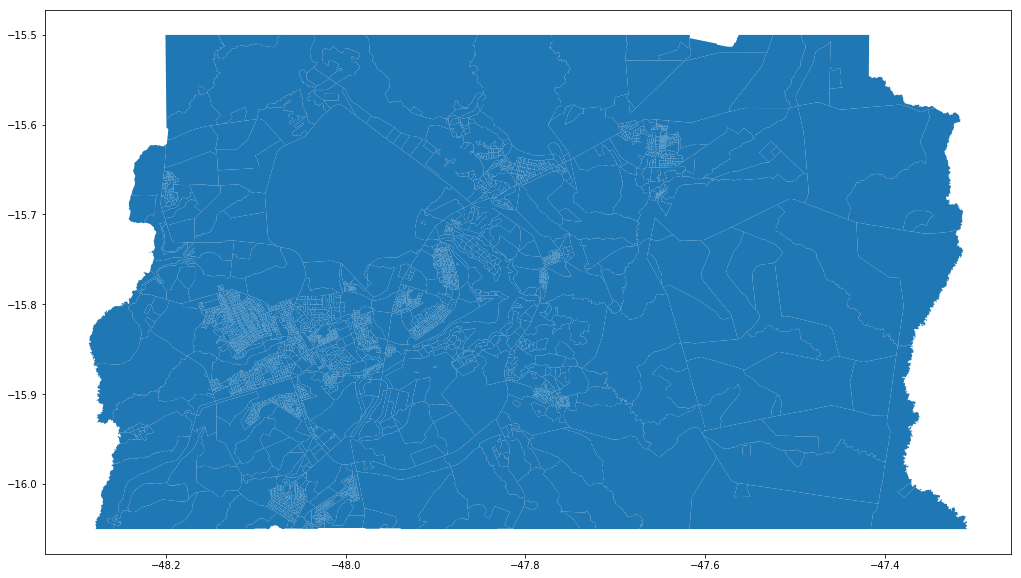

In [3]:
df.plot(figsize=(20,10))

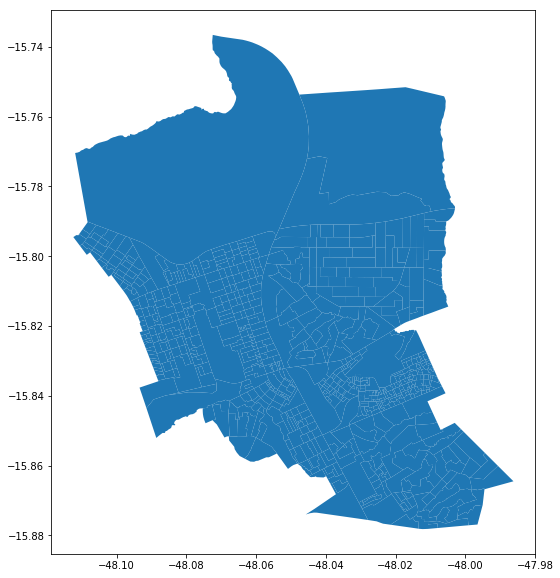

In [4]:
df[df.NM_SUBDIST == 'TAGUATINGA'].plot(figsize=(20,10))

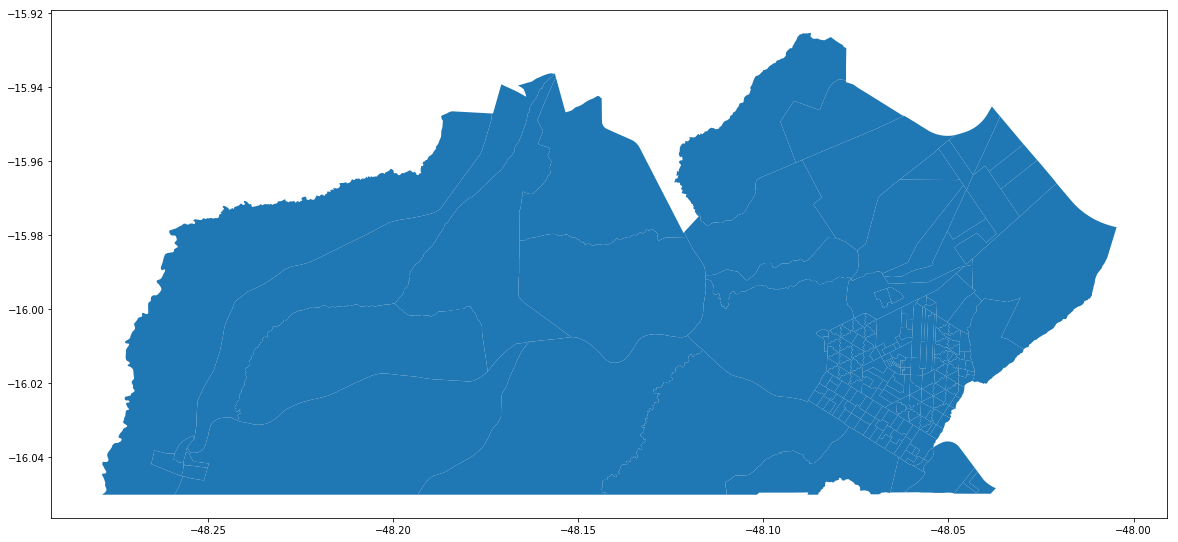

In [5]:
df[df.NM_SUBDIST == 'GAMA'].plot(figsize=(20,10))

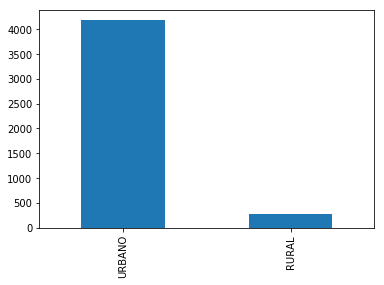

In [6]:
df.TIPO.value_counts().plot.bar()

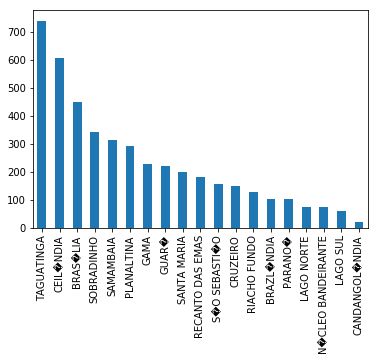

In [7]:
df.NM_SUBDIST.value_counts().plot.bar()

In [8]:
df_subdistritos = pd.DataFrame(df.CD_GEOCODS.value_counts().index,columns=['CD_GEOCODS'])
df_subdistritos['id_exploratoria'] = range(df.CD_GEOCODS.value_counts().index.size)
df = df.merge(df_subdistritos, on='CD_GEOCODS', how='left')

In [9]:
mapa = folium.Map([-15.7882294,-47.8884416], zoom_start = 10)
mapa

In [10]:
df.CD_GEOCODI = pd.to_numeric(df.CD_GEOCODI, errors='coerce')

In [11]:
# Cria uma coluna com números aleatórios para testarmos o choropleth
#df['random'] = np.random.randint(1, 6, df.shape[0])

In [12]:
folium.Choropleth(
    geo_data=df.to_json(),
    name='choropleth',
    data=df,
    columns=['ID', 'id_exploratoria'],
    key_on='feature.properties.ID',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rate (%)'
).add_to(mapa)

In [13]:
mapa.save('teste.html')